## Primera Entrega - Curso Data Science (CoderHouse)
### Maite Ugalde

- Antecedentes

En la actualidad, en Argentina el acceso a la educación primaria y secundaria es un derecho y obligación sin embargo, la deserción escolar aumenta a medida que se avanza en los niveles educativos. En poblaciones con menores recursos, especialmente en áreas rurales o más alejadas, la desigualdad en el acceso a la educación es más pronunciada, agravada por factores económicos y sociales. Esto genera una brecha educativa que se refleja en la empleabilidad y el ingreso a lo largo del tiempo, reforzando las desigualdades socioeconómicas estructurales. Según la Encuesta Permanente de Hogares (EPH), los niveles de informalidad laboral y el acceso desigual a servicios educativos y de salud son mayores en áreas rurales y pequeñas ciudades.

Para intentar mejorar las perspectivas socioeconómicas a largo plazo, es clave entender el nivel educativo de la sociedad, ya que la educación es uno de los principales motores de movilidad social y un determinante clave del desarrollo económico y social. Aquellos con niveles educativos más bajos tienden a tener empleos informales, menores ingresos y acceso limitado a oportunidades, perpetuando ciclos de pobreza e inestabilidad laboral.

- Objetivo

Dado que las condiciones socioeconómicas suelen ser una de las consecuencias del nivel educativo de los adultos, el presente modelo intentará explorar cómo el nivel educativo de los adultos impacta en diversas variables socioeconómicas, y cómo estas varían según el lugar de residencia de la persona. Es decir, teniendo una persona con X condiciones socioeconómicas (empleo, ingresos, vivienda, acceso a servicios de salud), ¿cuál es la probabilidad de que cuente con cierto nivel educativo? ¿Cómo varían estas probabilidades según el lugar de la Argentina de residencia?


- Fuente de datos

Encuesta Permanente de Hogares - Instituto Nacional de Estadística y Censos (INDEC)
Primer trimestre 2024.
Disponible en: https://www.indec.gob.ar/indec/web/Institucional-Indec-BasesDeDatos

In [161]:
#Importación de librerías 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Primera Exploración

In [162]:
# Importación del dataset - El documento con la raw data puede accederse desde el repositorio de GitHub habiendolo cargado previamente allí.
url = 'https://github.com/maiteuen/CoderHouse/raw/main/Entregas%20CODER/usu_individual_T124.xlsx'
eph = pd.read_excel(url)
eph.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610


### 2. Construcción del DataFrame con la información necesaria para este estudio

Como mucha de la informacion que provee este dataset no la tendremos en cuenta para este trabajo, contruyo mi DataFrame con las columnas necesarias y renombro las columnas para más claridad. A su vez, este dataset presenta información sobre las horas trabajadas en el trabajo principal y las horas trabajadas en el trabajo secundario (si tiene). Pero yo quiero saber las horas trabajadas totales, así que crearé otra columna que sume a estas dos.

In [165]:
df = pd.DataFrame(eph[['MAS_500','AGLOMERADO','CH04','CH06','CH07','CH08','CH15','NIVEL_ED','ESTADO','CAT_OCUP','CAT_INAC','PP03D','PP3E_TOT','PP3F_TOT','PP03G','PP04B_COD','PP04B3_ANO','PP08D1','PP10A','ITF']])
df['HS TRABAJADAS SEMANALES'] = df['PP3E_TOT'] + df['PP3F_TOT']
df.rename(columns={'CH04': 'SEXO','CH06':'AÑOS','CH07':'ESTADO CIVIL','CH08':'COBERTURA MÉDICA','CH15':'LUGAR DE NACIMIENTO','ESTADO':'ESTADO LABORAL','PP03D':'CANT. DE OCUPACIONES','PP03G':'MÁS TRABAJO?','PP04B_COD':'RUBRO EMPRESA','PP04B3_ANO':'ANTIGÜEDAD','PP08D1':'SUELDO INDIVIDUAL','PP10A':'TIEMPO BUSCANDO EMPLEO','ITF':'INGRESO TOTAL FAMILIAR'}, inplace=True)
df.head()


,MAS_500,AGLOMERADO,SEXO,AÑOS,ESTADO CIVIL,COBERTURA MÉDICA,LUGAR DE NACIMIENTO,NIVEL_ED,ESTADO LABORAL,CAT_OCUP,...,CANT. DE OCUPACIONES,PP3E_TOT,PP3F_TOT,MÁS TRABAJO?,RUBRO EMPRESA,ANTIGÜEDAD,SUELDO INDIVIDUAL,TIEMPO BUSCANDO EMPLEO,INGRESO TOTAL FAMILIAR,HS TRABAJADAS SEMANALES
0,S,10,2,44,5,1,1,3,1,3,...,0.0,30.0,0.0,2.0,4000.0,0.0,-9.0,NaN,0,30.0
1,S,10,2,22,5,1,1,5,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,S,10,2,3,5,1,1,7,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,S,10,1,54,2,1,1,4,1,3,...,0.0,40.0,0.0,2.0,2500.0,0.0,250000.0,NaN,850000,40.0
4,S,10,2,53,2,4,1,4,1,3,...,0.0,20.0,0.0,2.0,4804.0,0.0,200000.0,NaN,850000,20.0


*Nota: Como estas son variables categóricas, el significado de cada categoría se observará en la sección de gráficos.

In [166]:
#Informacion sobre las columnas y variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46050 entries, 0 to 46049
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MAS_500                  46050 non-null  object 
 1   AGLOMERADO               46050 non-null  int64  
 2   SEXO                     46050 non-null  int64  
 3   AÑOS                     46050 non-null  int64  
 4   ESTADO CIVIL             46050 non-null  int64  
 5   COBERTURA MÉDICA         46050 non-null  int64  
 6   LUGAR DE NACIMIENTO      46050 non-null  int64  
 7   NIVEL_ED                 46050 non-null  int64  
 8   ESTADO LABORAL           46050 non-null  int64  
 9   CAT_OCUP                 46050 non-null  int64  
 10  CAT_INAC                 46050 non-null  int64  
 11  CANT. DE OCUPACIONES     20325 non-null  float64
 12  PP3E_TOT                 20325 non-null  float64
 13  PP3F_TOT                 20325 non-null  float64
 14  MÁS TRABAJO?          

Como sólo me voy a basar en las personas que legalmente pueden trabajar, me quedaré con las personas mayores de edad:

In [167]:
df_filtered1 = df[df['AÑOS'] >= 18]

A su vez, sólamente quiero tener en cuenta las personas laboralmente activas (por más que estén desempleados), ya que tendré información sobre el sueldo, antigüedad laboral, horas trabajadas semanales, etc., porque justamente son estas variables las que tendré en cuenta para mi trabajo.

In [168]:
(df_filtered1['ESTADO LABORAL'] == 3).sum()

13067

Estas *13067* personas se encuentras 'Inactivas', lo que significa que por alguna razón no están trabajando pero tampoco buscando empleo. Muchos de ellos podrian encontrarse estudiando exclusivamente o ser ya jubilados. Vamos a comprobarlo:

In [169]:
df_inactivos = df_filtered1[df_filtered1['ESTADO LABORAL'] == 3]
result = df_inactivos[['ESTADO LABORAL', 'CAT_INAC']].groupby('CAT_INAC').agg({'CAT_INAC': 'count'}).copy()
result

,CAT_INAC
CAT_INAC,
1,4735
2,101
3,2389
4,4430
6,437
7,975


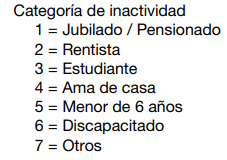

In [170]:
#Con toda esta información vuelvo a definir a mi df para las personas laboralmente activas (incluidas las personas desempleadas)
df = df_filtered1[df_filtered1['ESTADO LABORAL'] != 3].copy()
df.count()

MAS_500                    21658
AGLOMERADO                 21658
SEXO                       21658
AÑOS                       21658
ESTADO CIVIL               21658
COBERTURA MÉDICA           21658
LUGAR DE NACIMIENTO        21658
NIVEL_ED                   21658
ESTADO LABORAL             21658
CAT_OCUP                   21658
CAT_INAC                   21658
CANT. DE OCUPACIONES       20242
PP3E_TOT                   20242
PP3F_TOT                   20242
MÁS TRABAJO?               20242
RUBRO EMPRESA              20242
ANTIGÜEDAD                 20242
SUELDO INDIVIDUAL          20242
TIEMPO BUSCANDO EMPLEO      1341
INGRESO TOTAL FAMILIAR     21658
HS TRABAJADAS SEMANALES    20242
dtype: int64

In [171]:
# Cuento vacíos Cant. de Ocupaciones para comprobar valores
df['CANT. DE OCUPACIONES'].isnull().value_counts()

CANT. DE OCUPACIONES
False    20242
True      1416
Name: count, dtype: int64

In [172]:
# Quienes son? 
df.loc[df['CANT. DE OCUPACIONES'].isnull() == True]

,MAS_500,AGLOMERADO,SEXO,AÑOS,ESTADO CIVIL,COBERTURA MÉDICA,LUGAR DE NACIMIENTO,NIVEL_ED,ESTADO LABORAL,CAT_OCUP,...,CANT. DE OCUPACIONES,PP3E_TOT,PP3F_TOT,MÁS TRABAJO?,RUBRO EMPRESA,ANTIGÜEDAD,SUELDO INDIVIDUAL,TIEMPO BUSCANDO EMPLEO,INGRESO TOTAL FAMILIAR,HS TRABAJADAS SEMANALES
61,N,19,2,23,5,4,1,5,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,600000,NaN
111,S,4,2,43,2,1,1,2,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,350000,NaN
210,N,20,1,43,5,4,3,5,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1200000,NaN
334,S,13,1,49,3,4,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,60000,NaN
399,S,33,2,49,2,4,4,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46006,S,29,2,29,1,4,1,4,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,140000,NaN
46042,S,33,1,63,2,1,1,4,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0,NaN
46046,S,33,1,21,5,1,1,3,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
46047,S,33,1,20,5,1,1,3,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


--> Reemplazo los NaN por 0 para no dejarlos afuera

¿Por qué los reemplazo por 0 en vez de quitarlos con un *'dropna'*?

- Si los quito, perdería informacion sobre, por ejemplo, los desempleados, ya que tienen 0 cantidad de ocupaciones. Según el diseño de la encuesta, sólamente las personas con ocupaciones debían responder a este apartado: https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_registro_1T2024.pdf


Algo similar sucede con 'MÁS TRABAJO?', 'RUBRO EMPRESA', 'ANTIGÜEDAD', 'SUELDO INDIVIDUAL', 'HS TRABAJADAS SEMANALES'.
De forma opuesta, sucede con 'TIEMPO BUSCANDO EMPLEO', ya que este apartado es para personas desempleadas. 

In [173]:
# Reemplazo con 0 a los valores vacíos 
df['CANT. DE OCUPACIONES'] = df['CANT. DE OCUPACIONES'].fillna(0)
df['MÁS TRABAJO?'] = df['MÁS TRABAJO?'].fillna(0)
df['RUBRO EMPRESA'] = df['RUBRO EMPRESA'].fillna(0)
df['ANTIGÜEDAD'] = df['ANTIGÜEDAD'].fillna(0)
df['SUELDO INDIVIDUAL'] = df['SUELDO INDIVIDUAL'].fillna(0)
df['HS TRABAJADAS SEMANALES'] = df['HS TRABAJADAS SEMANALES'].fillna(0)
df['TIEMPO BUSCANDO EMPLEO'] = df['TIEMPO BUSCANDO EMPLEO'].fillna(0)

df.count()


MAS_500                    21658
AGLOMERADO                 21658
SEXO                       21658
AÑOS                       21658
ESTADO CIVIL               21658
COBERTURA MÉDICA           21658
LUGAR DE NACIMIENTO        21658
NIVEL_ED                   21658
ESTADO LABORAL             21658
CAT_OCUP                   21658
CAT_INAC                   21658
CANT. DE OCUPACIONES       21658
PP3E_TOT                   20242
PP3F_TOT                   20242
MÁS TRABAJO?               21658
RUBRO EMPRESA              21658
ANTIGÜEDAD                 21658
SUELDO INDIVIDUAL          21658
TIEMPO BUSCANDO EMPLEO     21658
INGRESO TOTAL FAMILIAR     21658
HS TRABAJADAS SEMANALES    21658
dtype: int64

In [174]:
df.head()

,MAS_500,AGLOMERADO,SEXO,AÑOS,ESTADO CIVIL,COBERTURA MÉDICA,LUGAR DE NACIMIENTO,NIVEL_ED,ESTADO LABORAL,CAT_OCUP,...,CANT. DE OCUPACIONES,PP3E_TOT,PP3F_TOT,MÁS TRABAJO?,RUBRO EMPRESA,ANTIGÜEDAD,SUELDO INDIVIDUAL,TIEMPO BUSCANDO EMPLEO,INGRESO TOTAL FAMILIAR,HS TRABAJADAS SEMANALES
0,S,10,2,44,5,1,1,3,1,3,...,0.0,30.0,0.0,2.0,4000.0,0.0,-9.0,0.0,0,30.0
3,S,10,1,54,2,1,1,4,1,3,...,0.0,40.0,0.0,2.0,2500.0,0.0,250000.0,0.0,850000,40.0
4,S,10,2,53,2,4,1,4,1,3,...,0.0,20.0,0.0,2.0,4804.0,0.0,200000.0,0.0,850000,20.0
5,S,10,2,26,5,4,1,6,1,3,...,0.0,40.0,0.0,2.0,5601.0,0.0,200000.0,0.0,850000,40.0
6,S,10,1,25,5,4,1,5,1,3,...,0.0,48.0,0.0,2.0,3100.0,0.0,200000.0,0.0,850000,48.0


## 3. Análisis del DataFrame: Detección de Outliers

Debo identificar los Outliers para:
- (A) SUELDO INDIVIDUAL

In [175]:
#SUELDO INDIVIDUAL
df['SUELDO INDIVIDUAL'].describe()

count    2.165800e+04
mean     1.853475e+05
std      2.709924e+05
min     -9.000000e+00
25%      0.000000e+00
50%      9.600000e+04
75%      3.000000e+05
max      1.000000e+07
Name: SUELDO INDIVIDUAL, dtype: float64

<Axes: xlabel='SUELDO INDIVIDUAL', ylabel='Probability'>

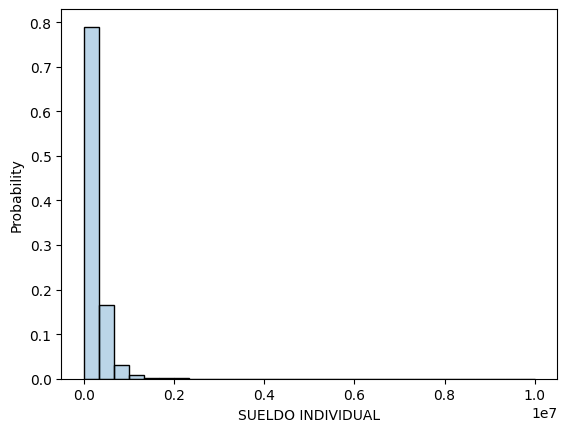

In [176]:
plt.figure()
sns.histplot(data = df,
             x = 'SUELDO INDIVIDUAL',
             bins = 30,            
             alpha = 0.3,
             kde = False,
             stat='probability')

In [180]:
# Método: IQR 
primer_cuartil_si = df['SUELDO INDIVIDUAL'].quantile(0.25)
tercer_cuartil_si = df['SUELDO INDIVIDUAL'].quantile(0.75)

rango_intercuartilico_si = tercer_cuartil_si - primer_cuartil_si

# Limites: 
limite_inf_si = primer_cuartil_si - (2 * rango_intercuartilico_si)
limite_sup_si = tercer_cuartil_si + (2 * rango_intercuartilico_si)

print(limite_inf_si,limite_sup_si)

-600000.0 900000.0


In [181]:
print(primer_cuartil_si,tercer_cuartil_si,rango_intercuartilico_si)

0.0 300000.0 300000.0


In [182]:
# Identifico outliers: 
df['Outlier_IQR_SI'] = np.where((df['SUELDO INDIVIDUAL'] < limite_inf_si) | (df['SUELDO INDIVIDUAL'] > limite_sup_si),1,0)
df['Outlier_IQR_SI'].value_counts()

Outlier_IQR_SI
0    21328
1      330
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers SUELDO INDIVIDUAL - Metodo IQR')

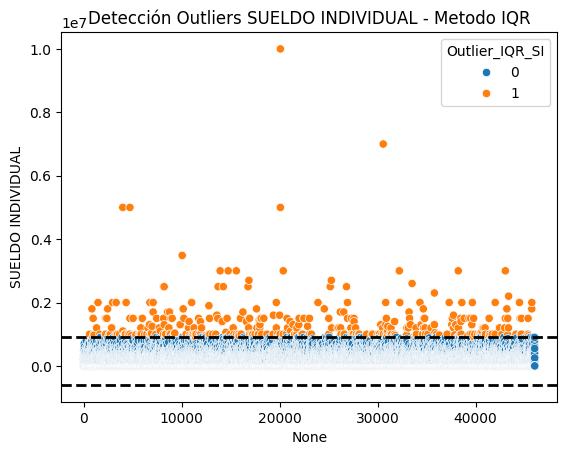

In [183]:
# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = df.index,
                y = 'SUELDO INDIVIDUAL',
               hue = 'Outlier_IQR_SI')
plt.axhline(y = limite_inf_si, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup_si, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers SUELDO INDIVIDUAL - Metodo IQR')

In [184]:
#Reemplazo los outliers por la media, ya que no quiero eliminar estas filas:
#Busco la media sin outliers
media_SI = df.loc[df['Outlier_IQR_SI'] == 0, 'SUELDO INDIVIDUAL'].mean()
df['SUELDO INDIVIDUAL'] = np.where(df['Outlier_IQR_SI'] == 1, media_SI, df['SUELDO INDIVIDUAL'])

In [185]:
#Corroboro:
df['Outlier_IQR_SI'] = np.where((df['SUELDO INDIVIDUAL'] < limite_inf_si) | (df['SUELDO INDIVIDUAL'] > limite_sup_si),1,0)
df['Outlier_IQR_SI'].value_counts()

Outlier_IQR_SI
0    21658
Name: count, dtype: int64

- (B) TIEMPO BUSCANDO EMPLEO

In [186]:
#TIEMPO BUSCANDO EMPLEO
df['TIEMPO BUSCANDO EMPLEO'].describe()

count    21658.000000
mean         0.189676
std          0.822660
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: TIEMPO BUSCANDO EMPLEO, dtype: float64

<Axes: xlabel='TIEMPO BUSCANDO EMPLEO', ylabel='Probability'>

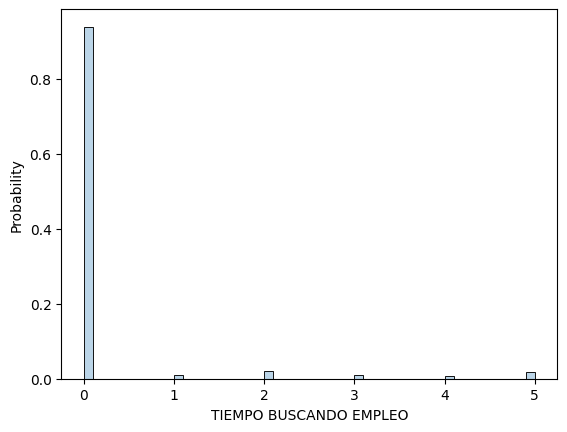

In [187]:
plt.figure()
sns.histplot(data = df,
             x = 'TIEMPO BUSCANDO EMPLEO',
             bins = 50,            
             alpha = 0.3,
             kde = False,
             stat='probability')

In [188]:
# Método: IQR 
primer_cuartil_tbe = df['TIEMPO BUSCANDO EMPLEO'].quantile(0.25)
tercer_cuartil_tbe = df['TIEMPO BUSCANDO EMPLEO'].quantile(0.75)

rango_intercuartilico_tbe = tercer_cuartil_tbe - primer_cuartil_tbe

# Limites: 
limite_inf_tbe = primer_cuartil_tbe - (2 * rango_intercuartilico_tbe)
limite_sup_tbe = tercer_cuartil_tbe + (2 * rango_intercuartilico_tbe)

print(limite_inf_tbe,limite_sup_tbe)

0.0 0.0


In [189]:
print(primer_cuartil_tbe,tercer_cuartil_tbe,rango_intercuartilico_tbe)

0.0 0.0 0.0


'TIEMPO BUSCANDO EMPLEO' no contiene outliers

- (C) INGRESO TOTAL FAMILIAR

Intento esta vez con Z score para probar otro tipo de identificación de outliers

In [190]:
#INGRESO TOTAL FAMILIAR
df['INGRESO TOTAL FAMILIAR'].describe()

count    2.165800e+04
mean     5.310906e+05
std      7.683114e+05
min      0.000000e+00
25%      0.000000e+00
50%      4.122500e+05
75%      7.492160e+05
max      3.393700e+07
Name: INGRESO TOTAL FAMILIAR, dtype: float64

<Axes: xlabel='INGRESO TOTAL FAMILIAR', ylabel='Probability'>

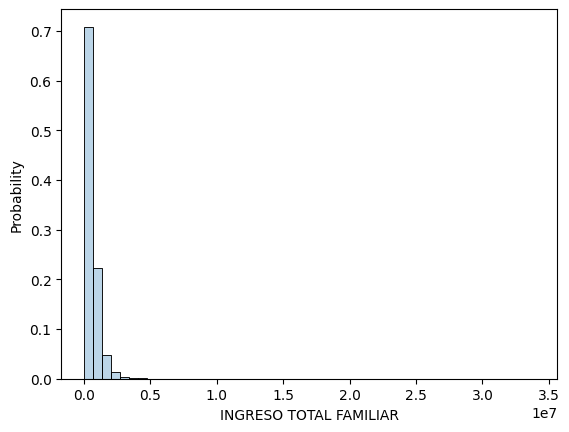

In [191]:
plt.figure()
sns.histplot(data = df,
             x = 'INGRESO TOTAL FAMILIAR',
             bins = 50,            
             alpha = 0.3,
             kde = False,
             stat='probability')

In [193]:
media = df['INGRESO TOTAL FAMILIAR'].mean()
desvio = df['INGRESO TOTAL FAMILIAR'].std()
valores_z = (df['INGRESO TOTAL FAMILIAR'] - media)/desvio

# Limites: 
limite_inf_itf = (-3)
limite_sup_itf = 3

print(valores_z)

0       -0.691244
3        0.415078
4        0.415078
5        0.415078
6        0.415078
           ...   
46044   -0.691244
46045   -0.691244
46046   -0.691244
46047   -0.691244
46049   -0.691244
Name: INGRESO TOTAL FAMILIAR, Length: 21658, dtype: float64


In [194]:
# Identifico outliers: 
df['Outlier_ZScore'] = np.where((valores_z < limite_inf_itf) | (valores_z > limite_sup_itf),1,0)
df['Outlier_ZScore'].value_counts()

Outlier_ZScore
0    21499
1      159
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers INGRESO TOTAL FAMILIAR - Metodo Z Score')

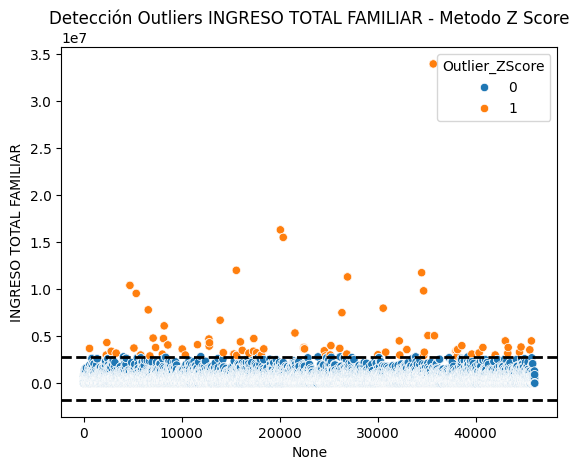

In [195]:
limite_inf_tr = limite_inf_itf * desvio + media
limite_sup_tr = limite_sup_itf * desvio + media

# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = df.index,
                y = 'INGRESO TOTAL FAMILIAR',
               hue = 'Outlier_ZScore')
plt.axhline(y = limite_inf_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers INGRESO TOTAL FAMILIAR - Metodo Z Score')

In [196]:
#Reemplazo los outliers por la media, ya que no quiero eliminar estas filas:
#Busco la media sin outliers
media_itf = df.loc[df['Outlier_ZScore'] == 0, 'INGRESO TOTAL FAMILIAR'].mean()
df['INGRESO TOTAL FAMILIAR'] = np.where(df['Outlier_ZScore'] == 1, media_itf, df['INGRESO TOTAL FAMILIAR'])

Text(0.5, 1.0, 'Corroboración del reemplazo de Outliers por la media para INGRESO TOTAL FAMILIAR - Metodo Z Score')

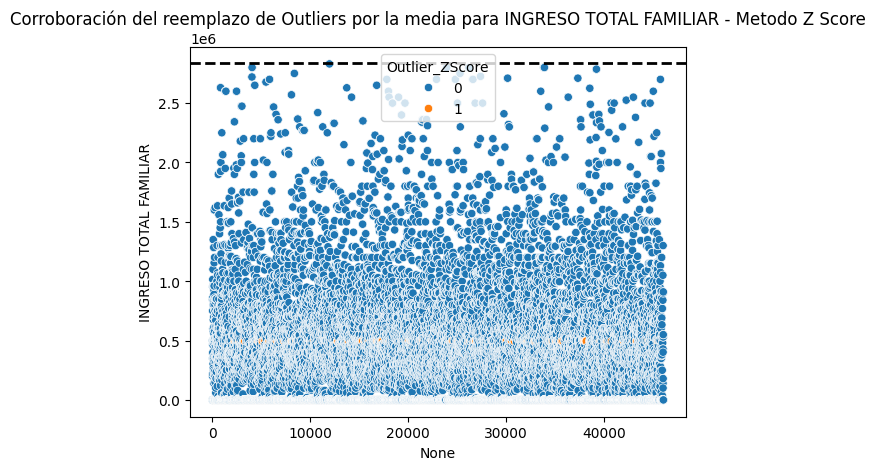

In [197]:
#Corroboro gráficamente:

limite_inf_tr = limite_inf_itf * desvio + media
limite_sup_tr = limite_sup_itf * desvio + media

# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = df.index,
                y = 'INGRESO TOTAL FAMILIAR',
               hue = 'Outlier_ZScore')
plt.axhline(y = limite_sup_tr, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Corroboración del reemplazo de Outliers por la media para INGRESO TOTAL FAMILIAR - Metodo Z Score')

- (D) ANTIGÜEDAD

In [198]:
#ANTIGÜEDAD
df['ANTIGÜEDAD'].describe()

count    21658.000000
mean         0.302660
std          2.339586
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         99.000000
Name: ANTIGÜEDAD, dtype: float64

<Axes: xlabel='ANTIGÜEDAD', ylabel='Probability'>

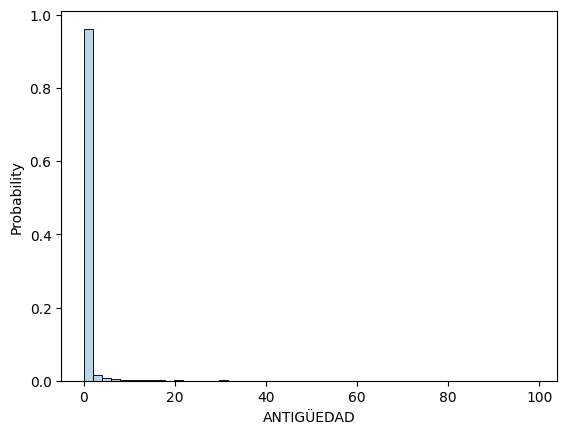

In [199]:
plt.figure()
sns.histplot(data = df,
             x = 'ANTIGÜEDAD',
             bins = 50,            
             alpha = 0.3,
             kde = False,
             stat='probability')

In [200]:
media_ant = df['ANTIGÜEDAD'].mean()
desvio_ant = df['ANTIGÜEDAD'].std()
valores_z_ant = (df['ANTIGÜEDAD'] - media)/desvio

# Limites: 
limite_inf_ant = (-3)
limite_sup_ant = 3

print(valores_z_ant)

0       -0.691244
3       -0.691244
4       -0.691244
5       -0.691244
6       -0.691244
           ...   
46044   -0.691244
46045   -0.691244
46046   -0.691244
46047   -0.691244
46049   -0.691244
Name: ANTIGÜEDAD, Length: 21658, dtype: float64


In [201]:
# Identifico outliers: 
df['Outlier_ZScore_ant'] = np.where((valores_z_ant < limite_inf_ant) | (valores_z_ant > limite_sup_ant),1,0)
df['Outlier_ZScore_ant'].value_counts()

Outlier_ZScore_ant
0    21658
Name: count, dtype: int64

Si bien en principio parecería no haber outliers, veo que al describir la variable obtengo un máximo de 99 años. Esto es en principio imposible, ya que la antigüedad en el último trabajo de una persona no puede ser de 99 años. A su vez, al ver los detalles del dataset disponible en https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_registro_1T2024.pdf se menciona que el 99 representa el "No sabe/No responde" para esta categoría. Es por ello que a todos los campos que en esta categoría tengan 99, se los tratará como outliers. 

In [202]:
#Media teniendo en cuenta las filas con valores igual a 99:
media_ant

0.30265952534860097

In [203]:
#Busco la media de antigüedad SIN tener en cuenta los valores 99
media_ant_sin99 = df.loc[df['ANTIGÜEDAD'] != 99, 'ANTIGÜEDAD'].mean()
media_ant_sin99

0.28442781934053757

In [204]:
#Reemplazo por la media
df['ANTIGÜEDAD'] = np.where(df['ANTIGÜEDAD'] == 99, media_ant_sin99, df['ANTIGÜEDAD'])

<Axes: xlabel='ANTIGÜEDAD', ylabel='Probability'>

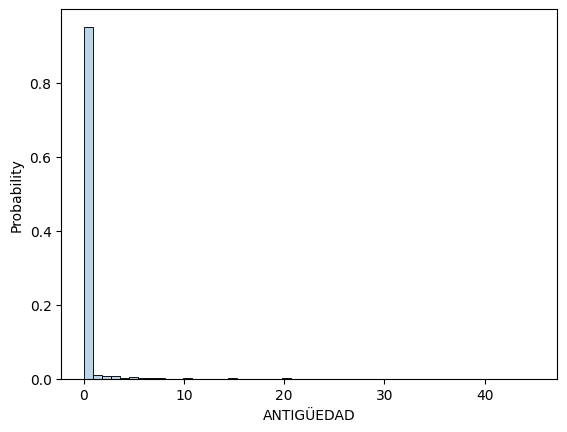

In [205]:
#Corroboro:
plt.figure()
sns.histplot(data = df,
             x = 'ANTIGÜEDAD',
             bins = 50,            
             alpha = 0.3,
             kde = False,
             stat='probability')

- (E) HS TRABAJADAS SEMANALES

In [206]:
#HS TRABAJADAS SEMANALES
df['HS TRABAJADAS SEMANALES'].describe()

count    21658.000000
mean        34.132884
std         43.048101
min          0.000000
25%         20.000000
50%         36.000000
75%         48.000000
max       1998.000000
Name: HS TRABAJADAS SEMANALES, dtype: float64

<Axes: xlabel='HS TRABAJADAS SEMANALES', ylabel='Probability'>

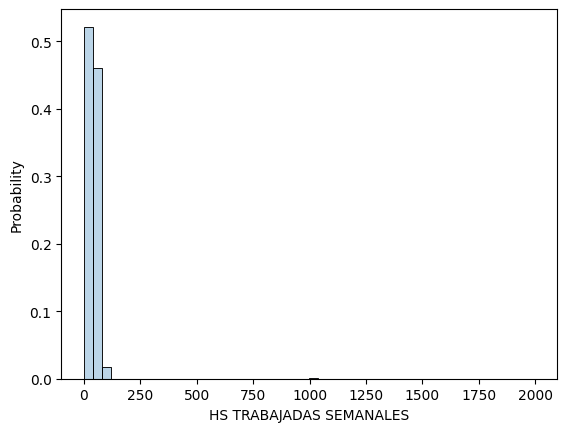

In [207]:
plt.figure()
sns.histplot(data = df,
             x = 'HS TRABAJADAS SEMANALES',
             bins = 50,            
             alpha = 0.3,
             kde = False,
             stat='probability')

In [208]:
# Método: IQR 
primer_cuartil_hts = df['HS TRABAJADAS SEMANALES'].quantile(0.25)
tercer_cuartil_hts = df['HS TRABAJADAS SEMANALES'].quantile(0.75)

rango_intercuartilico_hts = tercer_cuartil_hts - primer_cuartil_hts

# Limites: 
limite_inf_hts = primer_cuartil_hts - (2 * rango_intercuartilico_hts)
limite_sup_hts = tercer_cuartil_hts + (2 * rango_intercuartilico_hts)

print(limite_inf_hts,limite_sup_hts)

-36.0 104.0


In [209]:
print(primer_cuartil_hts,tercer_cuartil_hts,rango_intercuartilico_hts)

20.0 48.0 28.0


In [210]:
# Identifico outliers: 
df['Outlier_IQR_hts'] = np.where((df['HS TRABAJADAS SEMANALES'] < limite_inf_hts) | (df['HS TRABAJADAS SEMANALES'] > limite_sup_hts),1,0)
df['Outlier_IQR_hts'].value_counts()

Outlier_IQR_hts
0    21591
1       67
Name: count, dtype: int64

Text(0.5, 1.0, 'Detección Outliers HS TRABAJADAS SEMANALES - Metodo IQR')

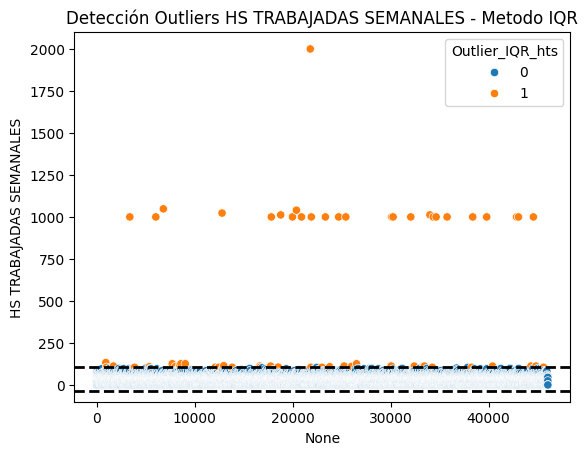

In [211]:
# Grafico 
plt.figure()
sns.scatterplot(data = df,
                x = df.index,
                y = 'HS TRABAJADAS SEMANALES',
               hue = 'Outlier_IQR_hts')
plt.axhline(y = limite_inf_hts, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Inferior',
            linewidth = 2)
plt.axhline(y = limite_sup_hts, 
            color = 'black', 
            linestyle = '--', 
            label = 'Limite Superior',
            linewidth = 2)
plt.title('Detección Outliers HS TRABAJADAS SEMANALES - Metodo IQR')

In [212]:
#Reemplazo los outliers por la media, ya que no quiero eliminar estas filas:
#Busco la media sin outliers
media_hts = df.loc[df['Outlier_IQR_hts'] == 0, 'HS TRABAJADAS SEMANALES'].mean()
df['HS TRABAJADAS SEMANALES'] = np.where(df['Outlier_IQR_hts'] == 1, media_hts, df['HS TRABAJADAS SEMANALES'])

In [213]:
#Corroboro:
df['Outlier_IQR_hts'] = np.where((df['HS TRABAJADAS SEMANALES'] < limite_inf_hts) | (df['HS TRABAJADAS SEMANALES'] > limite_sup_hts),1,0)
df['Outlier_IQR_hts'].value_counts()

Outlier_IQR_hts
0    21658
Name: count, dtype: int64

## 4. Análisis del DataFrame: Correlación entre variables

In [214]:
# Matriz de correlacion
matriz_correlacion = df[['NIVEL_ED','ESTADO LABORAL','AÑOS','SUELDO INDIVIDUAL','INGRESO TOTAL FAMILIAR', 'HS TRABAJADAS SEMANALES']].corr(method='pearson').round(3)
matriz_correlacion

,NIVEL_ED,ESTADO LABORAL,AÑOS,SUELDO INDIVIDUAL,INGRESO TOTAL FAMILIAR,HS TRABAJADAS SEMANALES
NIVEL_ED,1.000,-0.044,-0.066,0.174,0.159,-0.029
ESTADO LABORAL,-0.044,1.000,-0.131,-0.195,-0.071,-0.381
AÑOS,-0.066,-0.131,1.000,0.018,-0.012,0.017
SUELDO INDIVIDUAL,0.174,-0.195,0.018,1.000,0.447,0.160
INGRESO TOTAL FAMILIAR,0.159,-0.071,-0.012,0.447,1.000,0.073
HS TRABAJADAS SEMANALES,-0.029,-0.381,0.017,0.160,0.073,1.000


Significados:
- Correlación mayor a cero: Si la correlación es igual a +1 significa que es positiva perfecta. En este caso significa que la correlación es positiva, es decir, que las variables se correlacionan directamente.
- Correlación menor a cero: Si la correlación es menor a cero, significa que es negativa, es decir, que las variables se relacionan inversamente.
Si el coeficiente es igual a -1, nos referimos a una correlación negativa perfecta.

In [215]:
# Selecciono a la variable NIVEL_ED para estudiar únicamente correlación con ella 
matriz_correlacion_nivel_ed = matriz_correlacion['NIVEL_ED']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido ya que se ha estudiado su relacion anteriormente
matriz_correlacion_nivel_ed = abs(matriz_correlacion_nivel_ed)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['NIVEL_ED']
# Las excluyo del análisis
matriz_correlacion_nivel_ed = matriz_correlacion_nivel_ed.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_nivel_ed = matriz_correlacion_nivel_ed.sort_values(ascending=False)

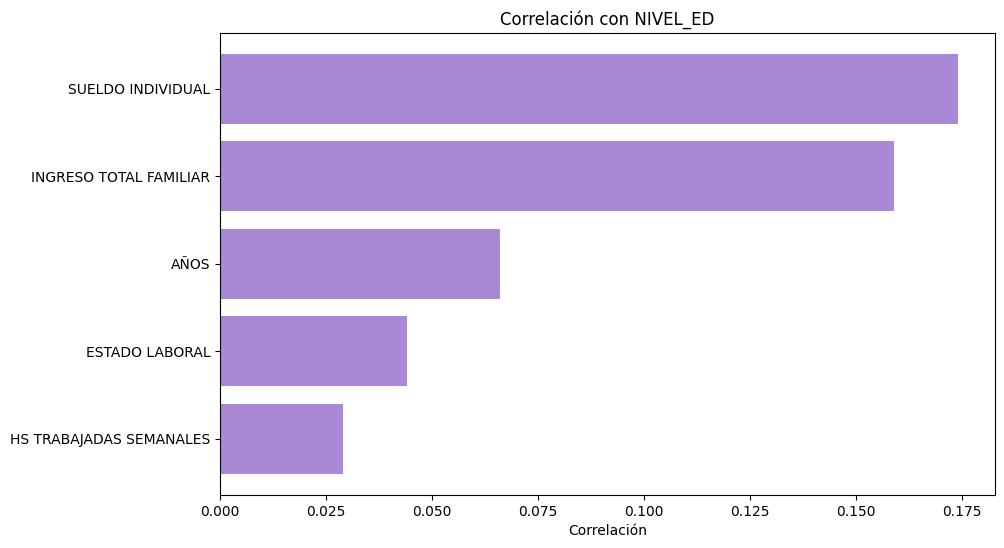

In [216]:
# Grafico las variables y su correlación con NIVEL_ED
matriz_correlacion_nivel_ed_graficar = matriz_correlacion_nivel_ed[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_nivel_ed_graficar.index, 
         matriz_correlacion_nivel_ed_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con NIVEL_ED')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

Significado:

Si bien las correlaciones no son extremadamente fuertes (ninguna está muy cerca del 1), puede observar una débil correlación entre el Nivel de Estudios y el Sueldo Individual de una persona. A más alto el nivel de estudios, más alto el sueldo. 

Por el contrario es interesante analizar el tema de las horas semanales trabajadas. A mayor nivel educativo, menos son las horas que una persona suele trabajar. Teniendo en cuenta lo analizado en el apartado anterior es interesante el siguiente dato:

- *El 25% de la muestra trabajó más de 48 horas por semana*. Es decir, 1 de cada 4 persona, ha trabajado 6 días por semana con una jornada aproximada de 8 horas o lo que también podría significar casi 10 horas por día por semana. 

## 5. Análisis univariado/bivariado/multivariado

In [217]:
# Para grafircar la Cantidad de personas encuestadas por tipo de aglomerado y nivel educativo
df_500 = df[['MAS_500','NIVEL_ED']].groupby(by=['NIVEL_ED','MAS_500']).size().reset_index(name='Cantidad por tipo de aglomerado')
df_500.head()

,NIVEL_ED,MAS_500,Cantidad por tipo de aglomerado
0,1,N,310
1,1,S,281
2,2,N,1214
3,2,S,1108
4,3,N,1878


C:\Users\Maite\AppData\Local\Temp\ipykernel_16128\3746636035.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#A989D6'` for the same effect.

  sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por tipo de aglomerado', hue='MAS_500', data = df_500,color = '#A989D6')
C:\Users\Maite\AppData\Local\Temp\ipykernel_16128\3746636035.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


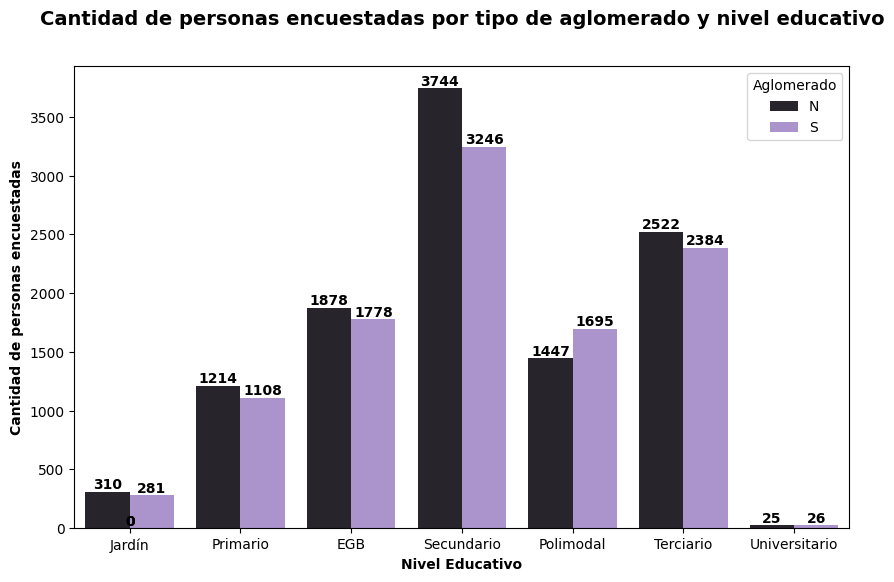

In [218]:
#Gráfico Cantidad de personas encuestadas por tipo de aglomerado y nivel educativo
plt.figure(figsize=(10,6))
sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por tipo de aglomerado', hue='MAS_500', data = df_500,color = '#A989D6')
plt.title("Cantidad de personas encuestadas por tipo de aglomerado y nivel educativo",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Nivel Educativo', fontweight = 'bold')
nuevas_etiquetas_x = ["Jardín", "Primario", "EGB", "Secundario", "Polimodal", "Terciario", "Universitario", "Posgrado", "Educación especial"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de personas encuestadas', fontweight = 'bold')
nuevas_etiquetas_legend = ["Aglomerado con menos de 500 mil habitantes","Aglomerado con mas de 500 mil habitantes"]
plt.legend(title = 'Aglomerado')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

In [219]:
df_aglomerado = df[['AGLOMERADO']].groupby(by=['AGLOMERADO']).size().reset_index(name='Cantidad por aglomerado')
df_aglomerado = df_aglomerado.sort_values(by='Cantidad por aglomerado', ascending=False)
top_8 = df_aglomerado.head(8) #como son muchos aglomerados, solo elijo los primeros 8
valores = top_8['Cantidad por aglomerado']
etiquetas = top_8['AGLOMERADO']
df_aglomerado.head()

,AGLOMERADO,Cantidad por aglomerado
26,33,2729
10,13,1095
22,29,976
18,23,916
8,10,898


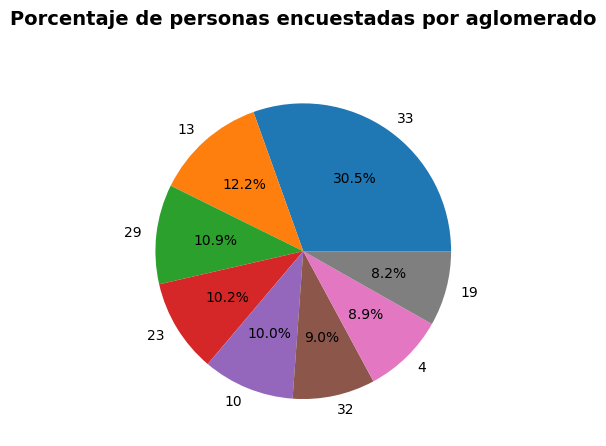

In [220]:
colors = sns.color_palette("pastel")
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%') # Para mostrar el porcentaje de cada sector en el gráfico
plt.title("Porcentaje de personas encuestadas por aglomerado",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.show()

In [221]:
df_sexo = df[['SEXO','NIVEL_ED']].groupby(by=['NIVEL_ED','SEXO']).size().reset_index(name='Cantidad por sexo')
df_sexo.head()

,NIVEL_ED,SEXO,Cantidad por sexo
0,1,1,409
1,1,2,182
2,2,1,1527
3,2,2,795
4,3,1,2411


C:\Users\Maite\AppData\Local\Temp\ipykernel_16128\1156769447.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


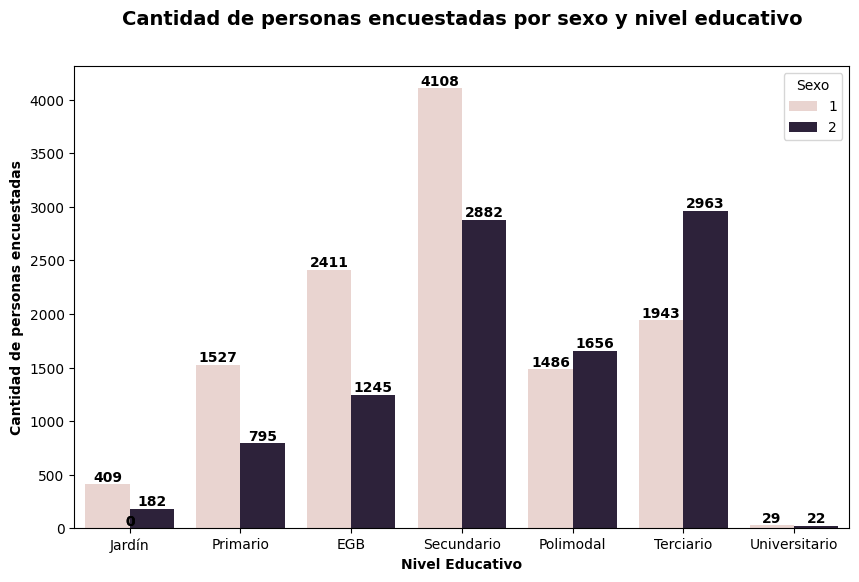

In [222]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por sexo', hue='SEXO', data = df_sexo)
plt.title("Cantidad de personas encuestadas por sexo y nivel educativo",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Nivel Educativo', fontweight = 'bold')
nuevas_etiquetas_x = ["Jardín", "Primario", "EGB", "Secundario", "Polimodal", "Terciario", "Universitario", "Posgrado", "Educación especial"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de personas encuestadas', fontweight = 'bold')
plt.legend(title = 'Sexo')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

In [223]:
df_estado_laboral = df[['ESTADO LABORAL','NIVEL_ED']].groupby(by=['NIVEL_ED','ESTADO LABORAL']).size().reset_index(name='Cantidad por ESTADO LABORAL')
df_estado_laboral.head()

,NIVEL_ED,ESTADO LABORAL,Cantidad por ESTADO LABORAL
0,1,0,1
1,1,1,549
2,1,2,41
3,2,0,12
4,2,1,2190


C:\Users\Maite\AppData\Local\Temp\ipykernel_16128\3670748175.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


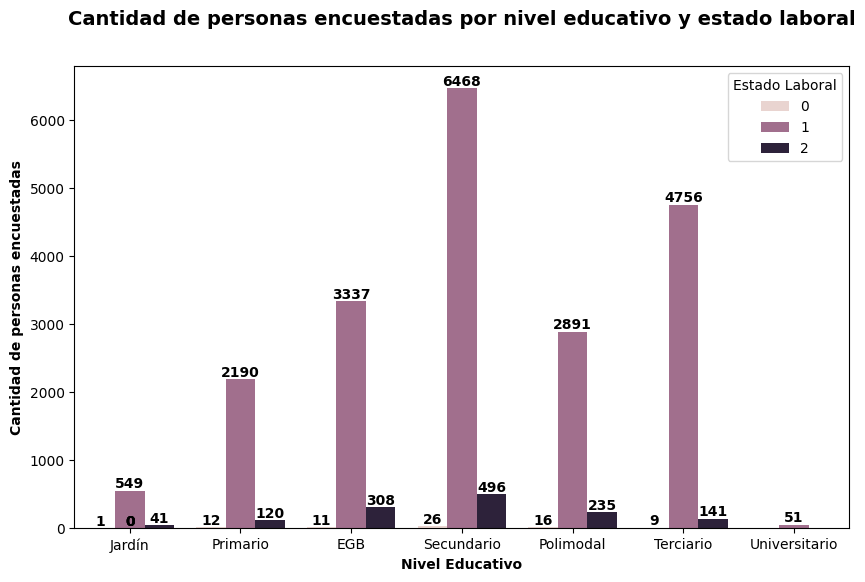

In [224]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por ESTADO LABORAL', hue='ESTADO LABORAL', data = df_estado_laboral)
plt.title("Cantidad de personas encuestadas por nivel educativo y estado laboral",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Nivel Educativo', fontweight = 'bold')
nuevas_etiquetas_x = ["Jardín", "Primario", "EGB", "Secundario", "Polimodal", "Terciario", "Universitario", "Posgrado", "Educación especial"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de personas encuestadas', fontweight = 'bold')
plt.legend(title = 'Estado Laboral')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

In [225]:
df_desempleo = df[df['TIEMPO BUSCANDO EMPLEO'] != 0] #solo me interesa saber la gente que esta desempleada, por lo que, si tiene 0 tiempo buscando trabajo es porque no lo esta
df_desempleo = df_desempleo[['TIEMPO BUSCANDO EMPLEO','NIVEL_ED']].groupby(by=['TIEMPO BUSCANDO EMPLEO','NIVEL_ED']).size().reset_index(name='Cantidad por TIEMPO BUSCANDO EMPLEO')
df_desempleo.head()

,TIEMPO BUSCANDO EMPLEO,NIVEL_ED,Cantidad por TIEMPO BUSCANDO EMPLEO
0,1.0,1,8
1,1.0,2,18
2,1.0,3,54
3,1.0,4,74
4,1.0,5,30


C:\Users\Maite\AppData\Local\Temp\ipykernel_16128\3628086389.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


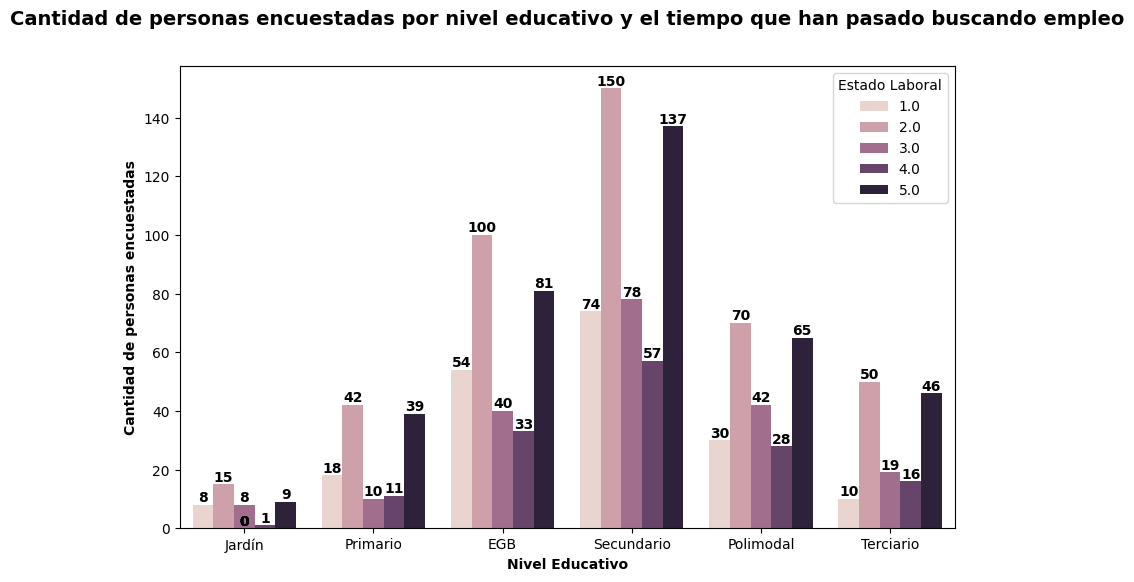

In [226]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por TIEMPO BUSCANDO EMPLEO', hue='TIEMPO BUSCANDO EMPLEO', data = df_desempleo)
plt.title("Cantidad de personas encuestadas por nivel educativo y el tiempo que han pasado buscando empleo",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Nivel Educativo', fontweight = 'bold')
nuevas_etiquetas_x = ["Jardín", "Primario", "EGB", "Secundario", "Polimodal", "Terciario", "Universitario", "Posgrado", "Educación especial"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de personas encuestadas', fontweight = 'bold')
plt.legend(title = 'Estado Laboral')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

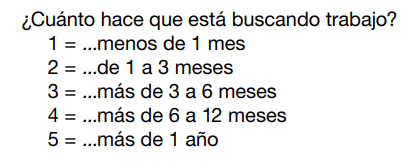

In [227]:
df_ocupaciones = df[(df['CANT. DE OCUPACIONES']!= 0) & (df['CANT. DE OCUPACIONES'] != 9)] #me interesa la gente que tiene una ocupacion o mas, no me interesa la gente que actualmente esta desempleada o no esta trabajando (0), ni los outliers (9)
df_ocupaciones = df_ocupaciones[['CANT. DE OCUPACIONES','NIVEL_ED']].groupby(by=['CANT. DE OCUPACIONES','NIVEL_ED']).size().reset_index(name='Cantidad por CANTIDAD DE OCUPACIONES')
df_ocupaciones.head()

,CANT. DE OCUPACIONES,NIVEL_ED,Cantidad por CANTIDAD DE OCUPACIONES
0,2.0,1,36
1,2.0,2,126
2,2.0,3,226
3,2.0,4,296
4,2.0,5,238


C:\Users\Maite\AppData\Local\Temp\ipykernel_16128\3097259880.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


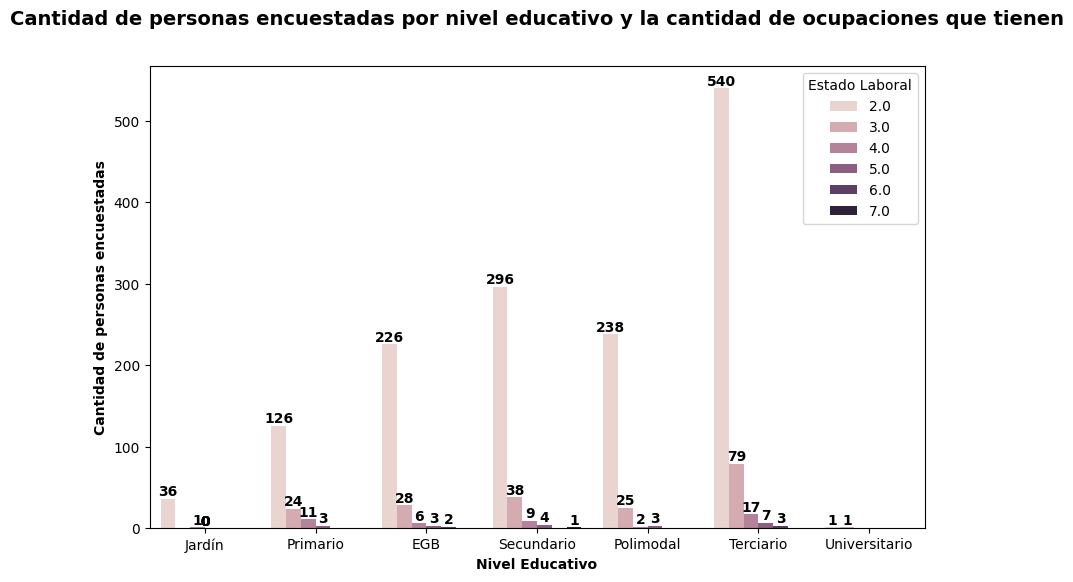

In [228]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por CANTIDAD DE OCUPACIONES', hue='CANT. DE OCUPACIONES', data = df_ocupaciones)
plt.title("Cantidad de personas encuestadas por nivel educativo y la cantidad de ocupaciones que tienen",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Nivel Educativo', fontweight = 'bold')
nuevas_etiquetas_x = ["Jardín", "Primario", "EGB", "Secundario", "Polimodal", "Terciario", "Universitario", "Posgrado", "Educación especial"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de personas encuestadas', fontweight = 'bold')
plt.legend(title = 'Estado Laboral')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

In [229]:
df_mas_trabajo = df[(df['MÁS TRABAJO?']!= 0) & (df['MÁS TRABAJO?']!= 9)] #me interesa la gente que ya esta trabajando sin utliers (9)
df_mas_trabajo = df_mas_trabajo[['MÁS TRABAJO?','NIVEL_ED']].groupby(by=['MÁS TRABAJO?','NIVEL_ED']).size().reset_index(name='Cantidad por MÁS TRABAJO?')
df_mas_trabajo.head(20)

,MÁS TRABAJO?,NIVEL_ED,Cantidad por MÁS TRABAJO?
0,1.0,1,123
1,1.0,2,429
2,1.0,3,740
3,1.0,4,965
4,1.0,5,499
5,1.0,6,512
6,1.0,7,13
7,2.0,1,426
8,2.0,2,1761
9,2.0,3,2597


C:\Users\Maite\AppData\Local\Temp\ipykernel_16128\2910553182.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(nuevas_etiquetas_x)


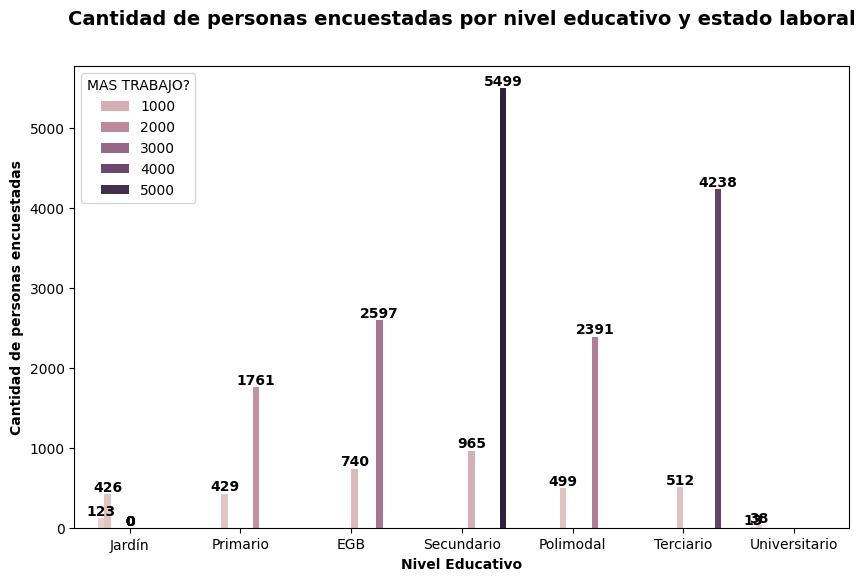

In [230]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'NIVEL_ED', y = 'Cantidad por MÁS TRABAJO?', hue='Cantidad por MÁS TRABAJO?', data = df_mas_trabajo)
plt.title("Cantidad de personas encuestadas por nivel educativo y estado laboral",
            fontsize = 14, fontweight = 'bold', pad = 30)
plt.xlabel('Nivel Educativo', fontweight = 'bold')
nuevas_etiquetas_x = ["Jardín", "Primario", "EGB", "Secundario", "Polimodal", "Terciario", "Universitario", "Posgrado", "Educación especial"]
ax = plt.gca()
ax.set_xticklabels(nuevas_etiquetas_x)
plt.ylabel('Cantidad de personas encuestadas', fontweight = 'bold')
plt.legend(title = 'MAS TRABAJO?')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0  # Calcula la posición x del texto
    y_text = p.get_height()  # Toma la altura de la columna
    ax.text(x_text, y_text, f'{int(y_text)}', # Indica posición x e y, y texto a mostrar 
            ha = 'center', # Alineación horizontal 
            va = 'bottom',  # Alineación vertical
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

In [232]:
df_hs_trabajadas = df[df['HS TRABAJADAS SEMANALES']!= 0] #me interesa la gente que trabaja

Text(0, 0.5, 'Cantidad de Personas')

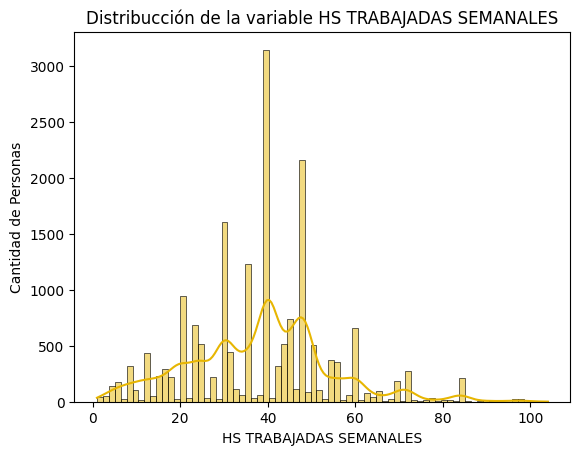

In [233]:
plt.figure()
sns.histplot(data = df_hs_trabajadas,
              x = 'HS TRABAJADAS SEMANALES',
             color = '#E7B602',
             kde = True)
plt.title('Distribucción de la variable HS TRABAJADAS SEMANALES')
plt.ylabel('Cantidad de Personas')

In [234]:
df_sueldo_individual = df[df['SUELDO INDIVIDUAL'] > 9] #me interesa la gente que trabaja y se ha puesto un 9 para la gente que no trabaja

Text(0, 0.5, 'Cantidad de Personas')

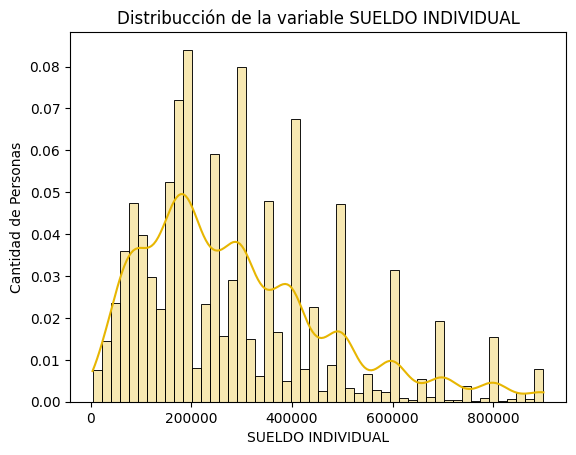

In [239]:
plt.figure()
sns.histplot(data = df_sueldo_individual,
             x = 'SUELDO INDIVIDUAL',
             bins = 50,            
             alpha = 0.3,
             kde = True,
             stat='probability',
             color = '#E7B602')
plt.title('Distribucción de la variable SUELDO INDIVIDUAL')
plt.ylabel('Cantidad de Personas')

Observaciones preliminares:

Se observa que la mayoría de las personas encuestadas tienen nivel secundario, tanto en aglomerados con más de 500.000 habitantes como de menos.

A su vez, se muestra la distribución porcentual de personas encuestadas por diferentes aglomerados. El aglomerado 33 tiene la mayor representación con un 30.5%, lo que indica que más de la tercera parte de los encuestados pertenecen a esta área. Otros aglomerados como el 13, 29, 23 y 10 también tienen una representación notable, cada uno superando el 10% del total de encuestados.
Esto podría indicar cierto sesgo en la muestra, ya que se está considerando una mayor cantidad de personas de este aglomerado. 

En los niveles educativos inferiores (Jardín, Primario, EGB y Secundario), hay una mayor proporción de hombres que han alcanzado estos niveles educativos.
A partir de niveles más altos (Polimodal, Terciario y Universitario), las mujeres predominan, lo que sugiere que más mujeres alcanzan niveles educativos superiores en comparación con los hombres.

Por otro lado, se demuestra cómo el nivel educativo está estrechamente relacionado con el estado laboral y el tiempo de búsqueda de empleo. Los niveles educativos bajos presentan una alta proporción de inactividad laboral y periodos prolongados de búsqueda de empleo.

A medida que aumenta el nivel educativo, especialmente en niveles como "Terciario", hay una mayor tasa de empleo y menores tiempos de búsqueda de trabajo, indicando una mayor empleabilidad para quienes alcanzan un nivel educativo superior. Sin embargo, en niveles educativos intermedios como "Secundario" y "Polimodal", si bien hay una alta tasa de empleo, también se observan casos de personas que llevan más de 1 año buscando empleo.